In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
!pip3 install seaborn==0.9.0

In [0]:
!pip install psycopg2

## Connecting to Postgres

In [0]:
import psycopg2

# connect to the PostgreSQL server
conn = psycopg2.connect(host="imt575group4.cdzfpivjhvbj.us-east-1.rds.amazonaws.com", database="imt575", user="amir", password="pleasework123")

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


**Linear Regression (for coefficients)**

In [0]:
## Regression coeffs -- http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
import statsmodels.api as sm

def reg_coeffs(X,Y):
  #X = business[X].values # This should be the input instead, not a string column label
  X = sm.add_constant(X)
  #Y = business[Y].values
  model = sm.OLS(Y, X, missing='drop')
  results = model.fit()

  slope = results.params[1]
  intercept = results.params[0]
  r2 = results.rsquared
  print("slope: {1}\nintercept: {0}\nR-squared: {2}".format(round(intercept,2), round(slope,2), round(r2,4)))

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Reading in the VIEW

In [0]:
business = pd.read_sql('SELECT * from vegas_business_checkins_2',conn)

In [0]:
business.shape

(8458, 18)

In [0]:
business.columns

Index(['business_id', 'city', 'review_count', 'stars', 'state', 'category',
       'accepts_credit_cards', 'good_for_kids', 'outdoor_seating',
       'restaurants_delivery', 'restaurants_price_range',
       'restaurants_reservations', 'restaurants_takeout', 'neighborhood',
       'business_parking', 'business_count', 'gini_index', 'num_check_ins'],
      dtype='object')

In [0]:
print(len(business['business_id']))
print(len(business['business_id'].unique()))

8458
8458


In [0]:
business.restaurants_delivery.value_counts()

0.00    4659
0.24    2350
1.00    1449
Name: restaurants_delivery, dtype: int64

## PLOTS

### YELP RATING vs RESTAURANT DELIVERY

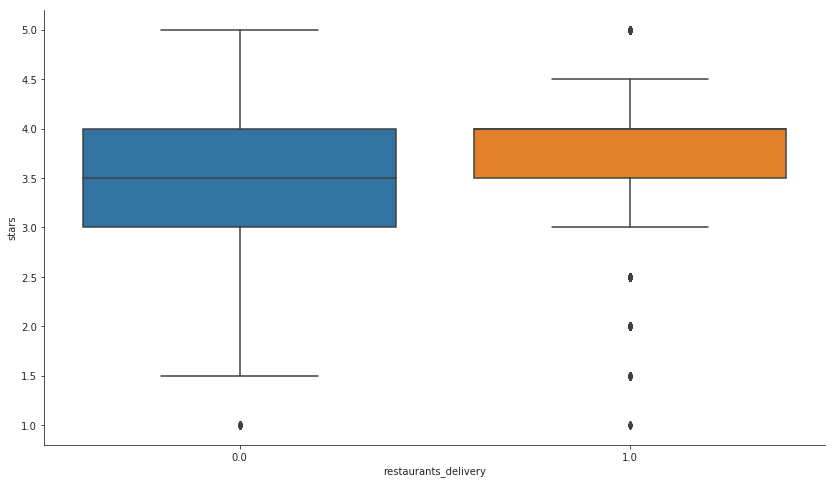

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot('restaurants_delivery','stars',data=business[business['restaurants_delivery']!=0.24],ax=ax)
sns.despine()

In [0]:
business.restaurants_takeout.value_counts()

1.00    6504
0.89    1119
0.00     835
Name: restaurants_takeout, dtype: int64

### YELP RATING vs DELIVERY w option of TAKEOUT

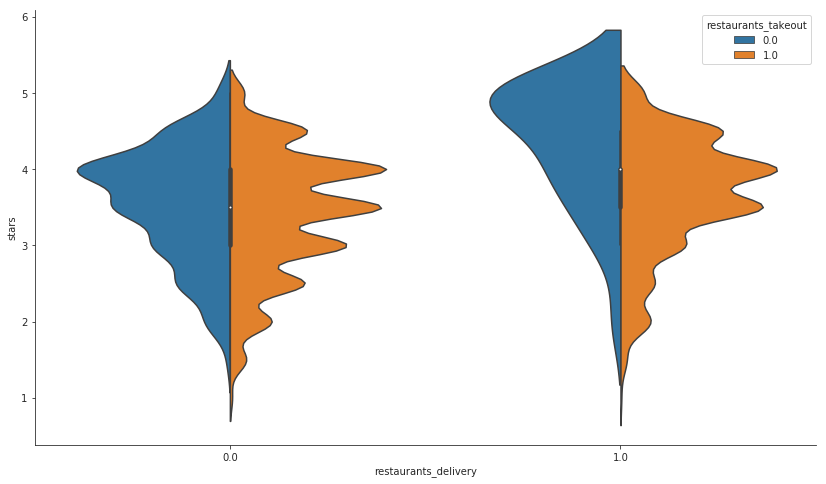

In [0]:
data = business[business['restaurants_takeout']!=0.89]

#def yesno(num):
#  if num == 

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.violinplot('restaurants_delivery','stars',hue='restaurants_takeout',data=data[data['restaurants_delivery']!=0.24],ax=ax,split=True) 
sns.despine()

### YELP RATING vs PRICE RANGE

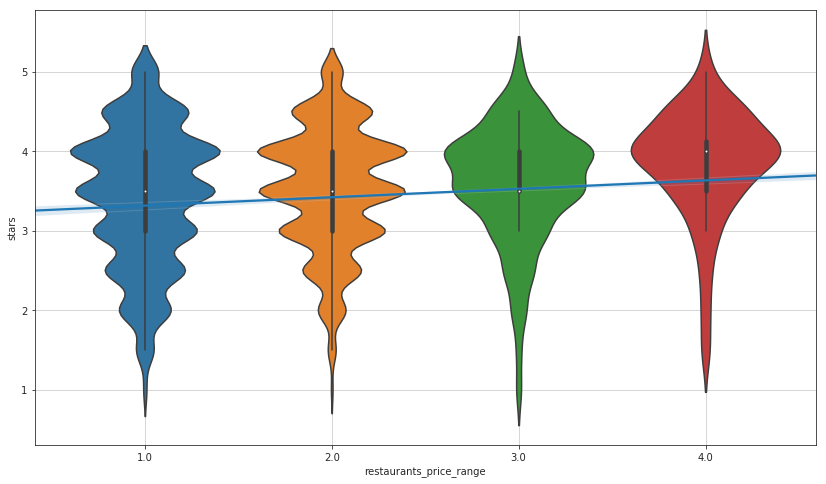

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.violinplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax,scale='width') 
sns.regplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax, scatter=False) 
#sns.countplot('restaurants_price_range',data=business[business['restaurants_price_range']!=1.54],ax=ax)
plt.grid()

[-0.27294098  0.27294098]
[3. 3.]


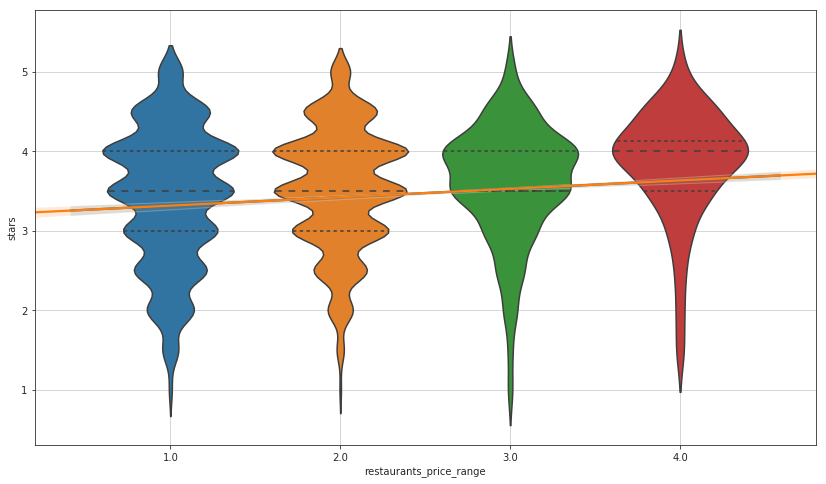

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.violinplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax,scale='width', inner = 'quartile') 
sns.regplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax, scatter=False) 
#sns.countplot('restaurants_price_range',data=business[business['restaurants_price_range']!=1.61],ax=ax)
plt.grid()

p = sns.regplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax, scatter=False) 
print(p.get_lines()[0].get_xdata())
print(p.get_lines()[0].get_ydata())

In [0]:
## Linear regression
subset = business[business['restaurants_price_range']!=1.61]
reg_coeffs(subset['restaurants_price_range'].values, subset['stars'].values)

slope: 0.11
intercept: 3.32
R-squared: 0.0072


In [0]:
ax=sns.violinplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax,scale='width', inner = 'quartile') 
medians = business.groupby(['restaurants_price_range'])['stars'].median().values


nobs = business['restaurants_price_range'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')
    
plt.show()


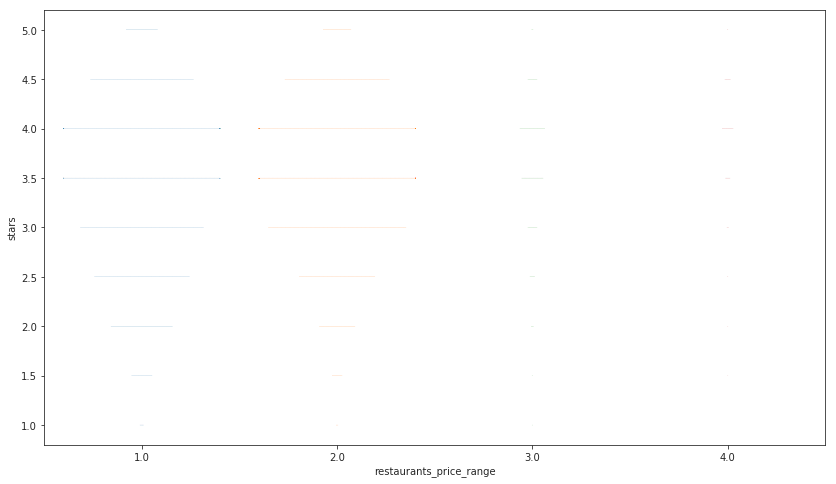

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.swarmplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax,size=0.2) 
#sns.regplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax) 


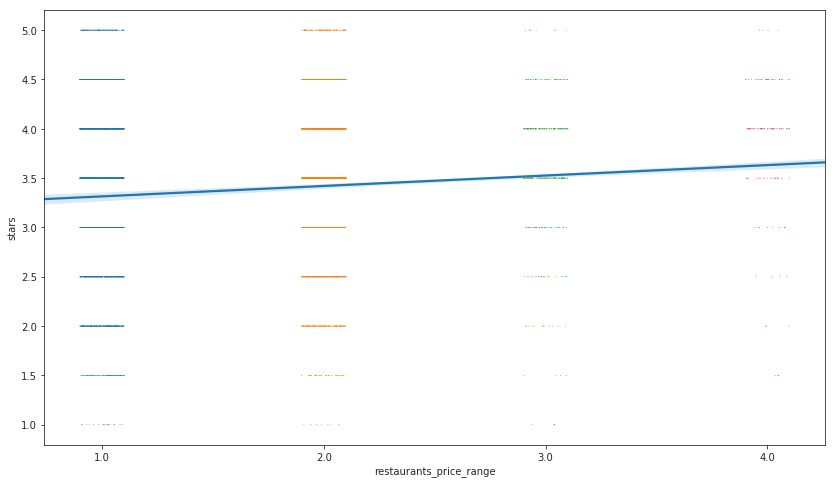

In [0]:
#sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.stripplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax,jitter=True,size=0.8) 
sns.regplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax,scatter=False) 


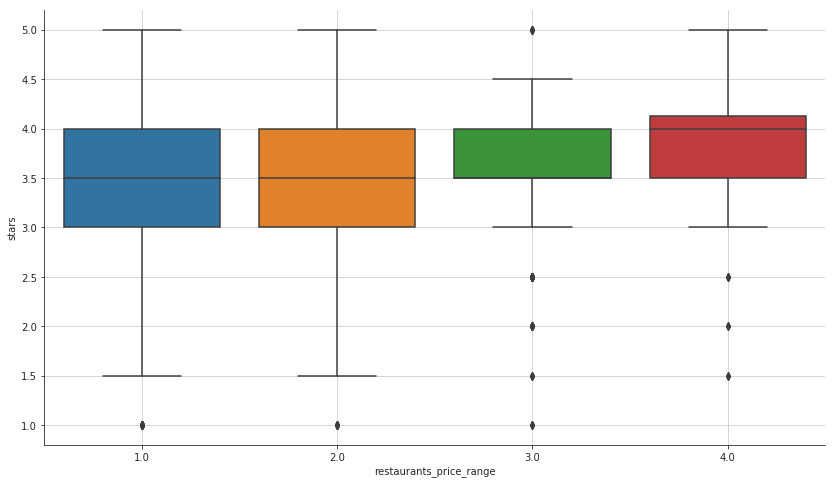

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot('restaurants_price_range','stars',data=business[business['restaurants_price_range']!=1.61],ax=ax) 
sns.despine()
plt.grid()

### YELP RATING vs DIVERSITY

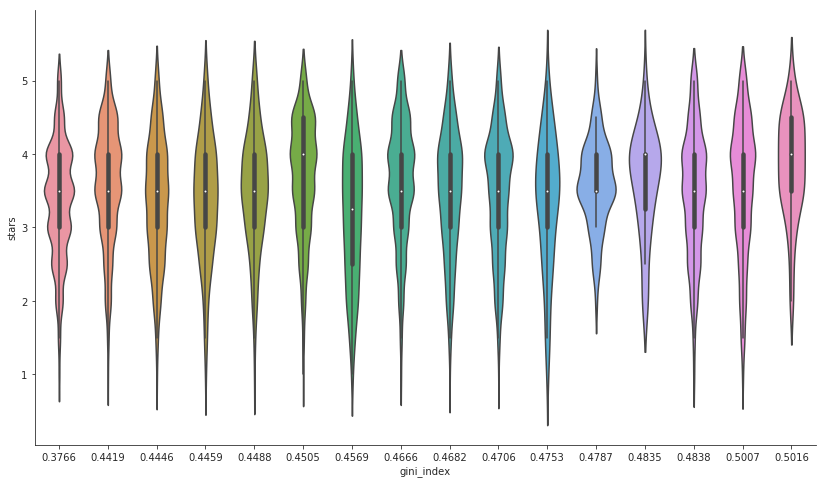

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.violinplot('gini_index','stars',data=business,ax=ax) 
#sns.regplot('gini_index','stars',data=business,ax=ax) 
sns.despine()

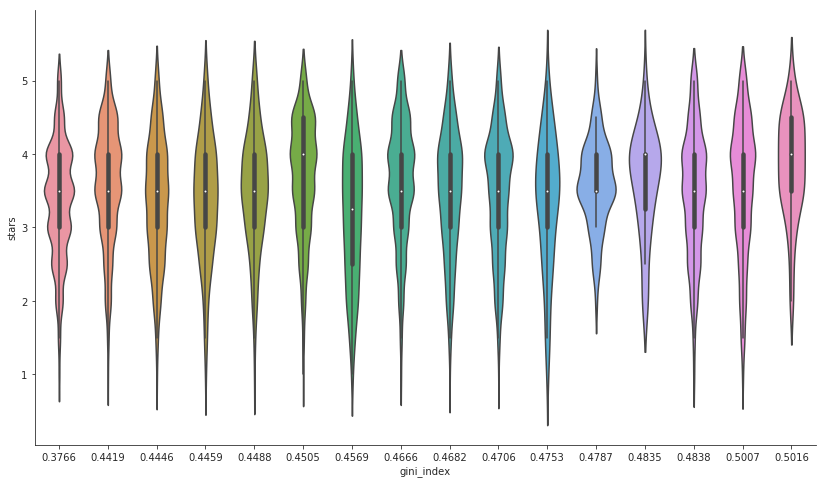

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.violinplot('gini_index','stars',data=business,ax=ax) 
sns.despine()

### Business Parking vs Yelp Rating

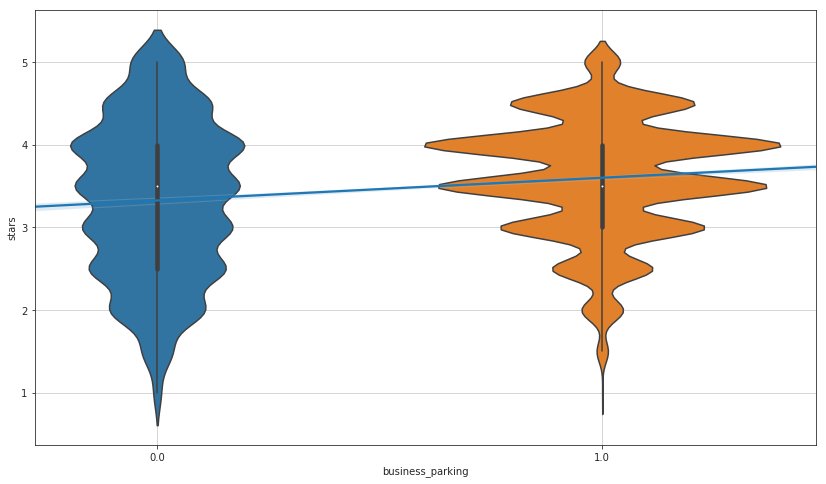

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.violinplot('business_parking','stars',data=business[business['business_parking']!=0.67],scale='count')
sns.regplot('business_parking','stars',data=business[business['business_parking']!=0.67],scatter=False)
plt.grid()

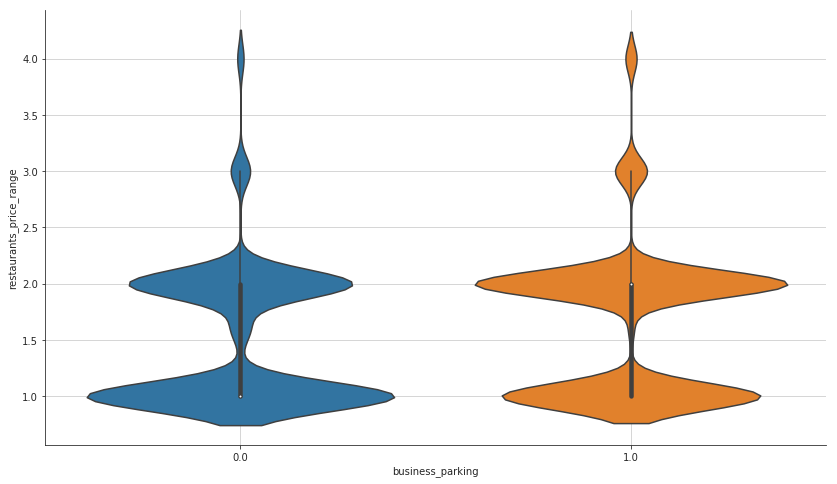

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.violinplot('business_parking','restaurants_price_range',data=business[business['business_parking']!=0.67],ax=ax) 
sns.despine()
plt.grid()

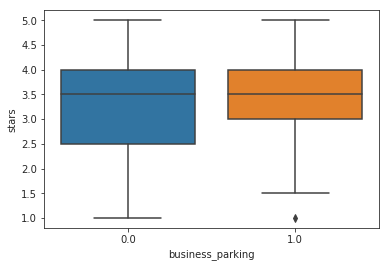

In [0]:
sns.boxplot('business_parking','stars',data=business[business['business_parking']!=0.67])

### Credit Card Acceptance vs Yelp Rating

(array([ 128., 8004.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

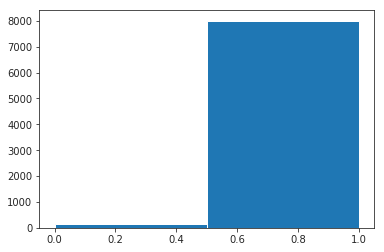

In [0]:
plt.hist('accepts_credit_cards', data=business[business['accepts_credit_cards']!=0.98], bins=2)

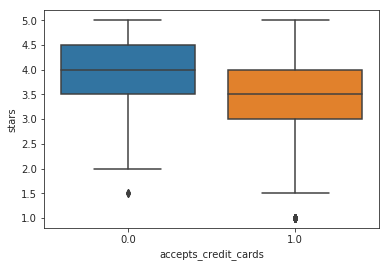

In [0]:
sns.boxplot('accepts_credit_cards','stars',data=business[business['accepts_credit_cards']!=0.98])

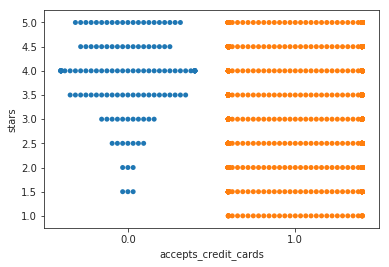

In [0]:
sns.swarmplot('accepts_credit_cards','stars',data=business[business['accepts_credit_cards']!=0.98])

### Neighborhood vs # of Checkins

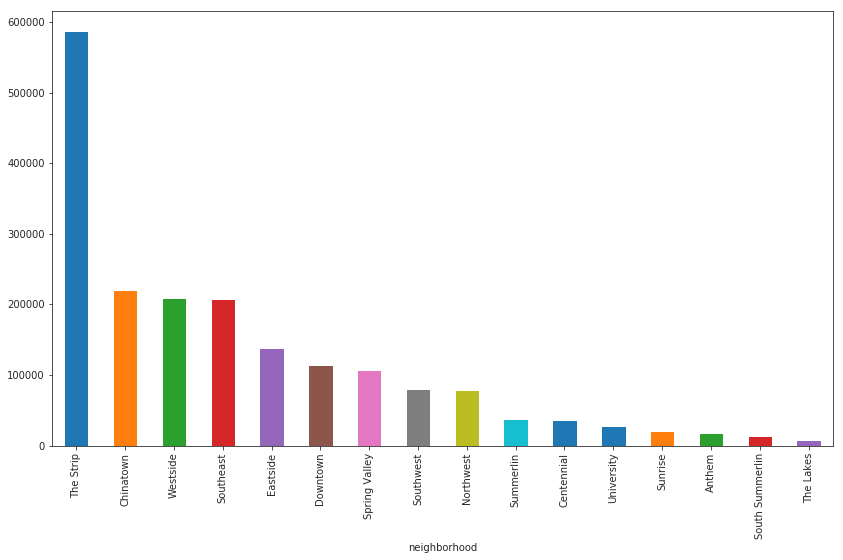

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
business.groupby(['neighborhood'])['num_check_ins'].sum().sort_values(ascending = False).plot(kind='bar')

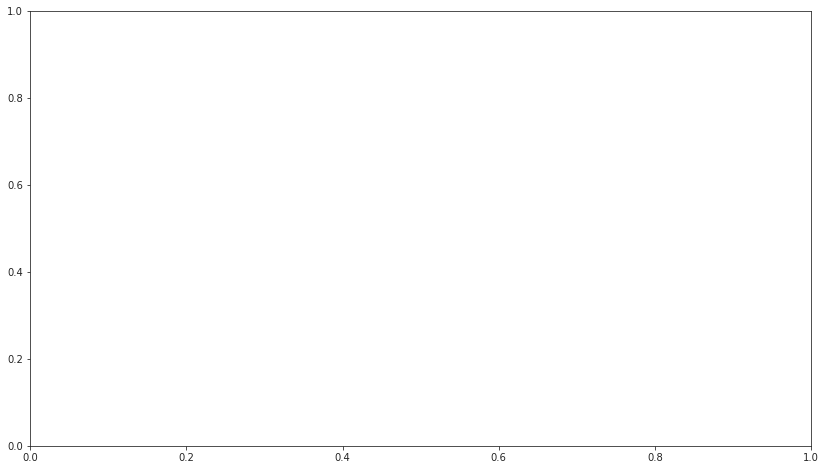

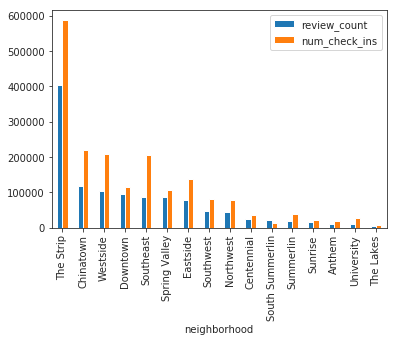

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
business.groupby(['neighborhood'])['review_count','num_check_ins'].sum().sort_values('review_count',ascending=False).plot(kind='bar')


### Neighboorhood vs # of Businesses

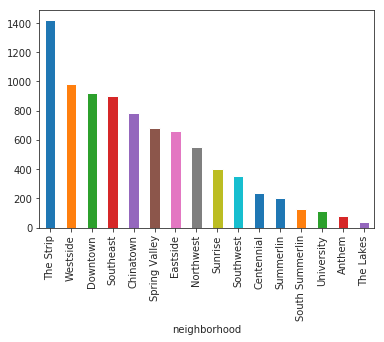

In [0]:
business.groupby(['neighborhood'])['business_count'].count().sort_values(ascending = False).plot(kind='bar')

### Neighborhood vs Avg Rating

Text(1.02,4,'mean')

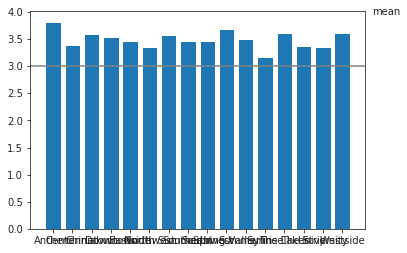

In [0]:
stars_nbd = business.groupby(['neighborhood'])['stars'].mean().sort_values(ascending = False).reset_index()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(stars_nbd.neighborhood,stars_nbd.stars)
ax.axhline(3, color="gray")
ax.text(1.02, 4, "mean", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
        transform=ax.get_yaxis_transform())


In [0]:
business.groupby(['neighborhood'])['stars'].mean().sort_values(ascending = False).plot(kind='bar', ylim=[3.0,4.0])

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.stripplot('neighborhood','stars',data=business[business['restaurants_price_range']!=1.61]) 
plt.xticks(rotation=45)
sns.despine()


In [0]:

#sns.scatterplot('num_check_ins','stars',data=business,ax=ax) 
#sns.despine()
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="num_check_ins", y="stars", data=business)

### Mean Price Range for every neighborhood

In [0]:
business.groupby(['neighborhood'])['restaurants_price_range'].mean().sort_values(ascending = False).plot(kind='bar')

In [0]:

business.columns

### Price Range vs Number of Checkins

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.stripplot('restaurants_price_range','num_check_ins',data=business[business['restaurants_price_range']!=1.61],jitter=True)
sns.despine()

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.stripplot('restaurants_price_range','review_count',data=business[business['restaurants_price_range']!=1.61],jitter=True)
sns.despine()

### Yelp Stars vs # of Checkins

In [0]:
sns.stripplot('stars','num_check_ins',data=business,jitter=True)
sns.despine()
# We can superimpose a regression line to this plot. Then we can interpret the positive regression coeffient by saying that restaurants that have higher starts tend to have higher checkins. 
# I'll try to figure this out using python libraries. Its easier to do this in R. 

In [0]:
sns.violinplot('outdoor_seating','stars',data=business[business['outdoor_seating']!=0.28])
plt.grid()

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.stripplot('stars','review_count',data=business[business['review_count']<=3000],jitter=True)
sns.regplot('stars','review_count',data=business[business['review_count']<=3000],scatter=False)
plt.grid()

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.regplot('review_count','stars',data=business[business['review_count']<=3000])
plt.grid()

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot('stars','review_count',data=business[business['review_count']<=3000])
sns.regplot('stars','review_count',data=business[business['review_count']<=3000],scatter=False)
plt.grid()

In [0]:
subset = business[business['review_count']<=3000]
reg_coeffs(subset['stars'].values, subset['review_count'].values)

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot('stars','num_check_ins',data=business)
sns.regplot('stars','num_check_ins',data=business,scatter=False)
plt.grid()

In [0]:
reg_coeffs(business['stars'].values,business['num_check_ins'].values)

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
#sns.boxplot('review_count','num_check_ins',data=business)
sns.regplot('review_count','num_check_ins',data=business,scatter=True)
plt.grid()

In [0]:
reg_coeffs(business['review_count'],business['num_check_ins'].values)

## Variation of Price Range and Business Parking with Stars

In [0]:
price_parking_df =  pd.DataFrame(business.groupby(['restaurants_price_range', 'business_parking'],as_index=False)['stars'].mean())
price_parking_df

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.barplot('restaurants_price_range','stars',hue='business_parking',data=price_parking_df[np.logical_and(price_parking_df.business_parking!=0.67, price_parking_df.restaurants_price_range!=1.61)]) 

In [0]:
sns.lmplot(x="restaurants_price_range", y="stars", hue="business_parking", data=business[np.logical_and(business.business_parking!=0.67, business.restaurants_price_range!=1.61)],scatter=False)

In [0]:
subset = business[np.logical_and(business.business_parking!=0.67, business.restaurants_price_range!=1.61)]
#subset['restaurants_price_range'].values

print("business_parking: YES")
sub_yes = subset[subset.business_parking==1.0]
print(reg_coeffs(sub_yes['restaurants_price_range'].values, sub_yes['stars'].values))

print("business_parking: NO")
sub_no = subset[subset.business_parking==0.0]
print(reg_coeffs(sub_no['restaurants_price_range'].values, sub_no['stars'].values))

#reg_coeffs()

## Variation of Price Range and Business Delivery with Yelp Rating

In [0]:
price_delivery_df =  pd.DataFrame(business.groupby(['restaurants_price_range', 'restaurants_delivery'],as_index=False)['stars'].mean())
price_delivery_df

In [0]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.barplot('restaurants_price_range','stars',hue='restaurants_delivery',data=price_delivery_df[np.logical_and(price_delivery_df.restaurants_delivery!=0.24, price_delivery_df.restaurants_price_range!=1.61)], ax=ax)

In [0]:
sns.lmplot(x="restaurants_price_range", y="stars", hue="restaurants_delivery", data=business[np.logical_and(business.restaurants_delivery!=0.24, business.restaurants_price_range!=1.61)], scatter=False, logx=True)

In [0]:
subset = business[np.logical_and(business.restaurants_delivery!=0.24, business.restaurants_price_range!=1.61)]
yes = subset[subset.restaurants_delivery==1.0]
reg_coeffs(yes['restaurants_price_range'].values, yes['stars'].values)
no = subset[subset.restaurants_delivery==0.0]
reg_coeffs(no['restaurants_price_range'].values, no['stars'].values)


In [0]:
## Regression
subset = price_delivery_df[np.logical_and(price_delivery_df.restaurants_delivery!=0.24, price_delivery_df.restaurants_price_range!=1.61)]
delivers = subset[subset['restaurants_delivery']==1.0]
no_delivers = subset[subset['restaurants_delivery']==0.0]

reg_coeffs(delivers['restaurants_price_range'].values, delivers['stars'].values)
reg_coeffs(no_delivers['restaurants_price_range'].values, no_delivers['stars'].values)

### Neighborhood vs Checkins and Reviews

In [0]:
business.groupby('neighborhood')['review_count','num_check_ins'].sum().sort_values(by='review_count', ascending=False).plot(kind='bar', figsize=(10,6))

In [0]:
ginindex_df = pd.DataFrame(business.groupby('neighborhood', as_index=False)['gini_index','stars'].mean().sort_values(by='gini_index', ascending=False))
ginindex_df

In [0]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.001, point['y'], str(point['val']))


In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x="gini_index", y="stars", data=ginindex_df, ax=ax)
label_point(ginindex_df.gini_index, ginindex_df.stars, ginindex_df.neighborhood, plt.gca())
plt.grid()

In [0]:
reg_coeffs(ginindex_df['gini_index'].values,ginindex_df['stars'].values)